In [1]:
%%html
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css">
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
<style>
img{
    border:20%;
    border-style: solid;
    
}

</style>

<img src="">

<font size="12"><b>Ready for your model 

if you don't know anything abou pandas and python, I suggest thw website below:


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import KFold

<img src="https://camo.githubusercontent.com/b1b68ef11b071a32f2512c9004e939eda686ddb9/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f315f6b666f6c642e706e67" class="img-thumbnail"  alt="Cinque Terre">

In [3]:
path = "t81_558_deep_learning/data"
filename_read = os.path.join(path, "auto-mpg.csv")

In [4]:
df = pd.read_csv(filename_read, na_values=['NA', '?'])

In [5]:
df.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
45,18.0,6,258.0,110.0,2962,13.5,71,1,amc hornet sportabout (sw)
258,20.6,6,231.0,105.0,3380,15.8,78,1,buick century special
304,37.3,4,91.0,69.0,2130,14.7,79,2,fiat strada custom
68,13.0,8,350.0,155.0,4502,13.5,72,1,buick lesabre custom


In [4]:
df = pd.read_csv(filename_read, na_values=['NA', '?'])
df = df.reindex(np.random.permutation(df.index))
kf = KFold(5)

fold = 1
for train_index, validate_index in kf.split(df):
    trainDF = pd.DataFrame(df.iloc[train_index, :])
    validateDF = pd.DataFrame(df.iloc[validate_index])
    print(f"Fold #{fold}, Training Size: {len(trainDF)}, Validation Size: {len(validateDF)}")
    fold += 1

Fold #1, Training Size: 318, Validation Size: 80
Fold #2, Training Size: 318, Validation Size: 80
Fold #3, Training Size: 318, Validation Size: 80
Fold #4, Training Size: 319, Validation Size: 79
Fold #5, Training Size: 319, Validation Size: 79


# Simple TensorFlow Classification: Iris

In [27]:
from seaborn import load_dataset
import os

In [23]:
df_isis = load_dataset('iris')
df_isis.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [1]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
from farhad.utility import encode_text_index, to_xy


url="https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/data/iris.csv"
df=pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')),na_values=['NA','?'])

species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

# Split into train/test
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=0,epochs=100)

Using TensorFlow backend.


In [2]:
# Print out number of species found:
print(species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
preds = model.predict(x)
predict_classes = np.argmax(preds,axis=1)
for num in predict_classes[0:4]:
    print('estiamte:',species[num],'prob',max(preds[num]))

estiamte: Iris-setosa prob 0.9986754
estiamte: Iris-setosa prob 0.9986754
estiamte: Iris-setosa prob 0.9986754
estiamte: Iris-setosa prob 0.9986754


In [14]:
model.evaluate(x,y)

150/150 [==============================] - 0s 359us/step


0.0950330924987793

In [16]:
predict_classes = np.argmax(preds,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
from sklearn.metrics import accuracy_score
# Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions,
# what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9733333333333334


In [20]:
# ad hoc prediction
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

# predict two sample flowers
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that {sample_flower} is: {species[pred]}")

[[5.1360368e-04 2.5423348e-01 7.4525285e-01]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica
[[5.1360368e-04 2.5423348e-01 7.4525285e-01]
 [9.9109882e-01 8.8938586e-03 7.3671063e-06]]
Predict that [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] is: ['Iris-virginica' 'Iris-setosa']


# Load/Save Trained Network

In [38]:
!mkdir model_save

In [39]:
!touch model_save/network.json

In [42]:
# save neural network structure to JSON (no weights)
save_path= 'model_save'
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

In [ ]:
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

In [43]:
!touch network.yaml

In [44]:
# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(save_path,"network.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)


In [ ]:
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

The following code contains several useful functions to encode the feature vector for various types of data. Encoding data:
<br><b>encode_text_dummy</b> - Encode text fields, such as the iris species as a single field for each class. Three classes would become "0,0,1" "0,1,0" and "1,0,0". Encode non-target predictors this way. Good for nominal.

<b>encode_text_index</b> - Encode text fields, such as the iris species as a single numeric field as "0" "1" and "2". Encode the target field for a classification this way. Good for nominal.


<b>encode_numeric_zscore </b>- Encode numeric values as a z-score. Neural networks deal well with "centered" fields, zscore is usually a good starting point for interval/ratio.

Creating the final feature vector:
to_xy - Once all fields are numeric, this function can provide the x and y matrixes that are used to fit the neural network.


# Dealing with Outliers

In [ ]:
import tensorflow.contrib.learn as skflow
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore


In [ ]:
path = "./data/"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# create feature vector
missing_median(df, 'horsepower')
df.drop('name',1,inplace=True)
#encode_numeric_binary(df,'mpg',20)
#df['origin'] = df['origin'].astype(str)
#encode_text_tfidf(df, 'origin')

# Drop outliers in horsepower
print("Length before MPG outliers dropped: {}".format(len(df)))
remove_outliers(df,'mpg',2)
print("Length after MPG outliers dropped: {}".format(len(df)))

print(df)

# Google API Keys

# Training with a Validation Set and Early Stopping

<b>Overfitting</b> occurs when a neural network is trained to the point that it begins to memorize rather than generalize.

<img src="https://camo.githubusercontent.com/0389ac092c2ad72e8dcc5734b1b5438fecb2261c/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f335f747261696e696e675f76616c2e706e67">

In [ ]:
from sklearn.model_selection import train_test_split

x,y = to_xy(df,"species")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

species = encode_text_index(df,"species")

# Different call back

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In the previous section we used early stopping so that the training would halt once the validation set no longer saw score improvements for a number of epoch. This number of epochs that early stopping will tolerate no improvement is called patience.

 If the patience value is large, the neural network's error may continue to worsen while early stopping is patiently waiting.
 
 The code presented below does this. An additional monitor is used and saves a copy of the neural network to best_weights.hdf5 each time the validation score of the neural network improves. Once training is done, we just reload this file and we have the optimal training weights that were found.

# Score

In [ ]:
from sklearn import metrics

In [ ]:
score = metrics.accuracy_score(y_compare, pred)

In [ ]:
score = metrics.log_loss(y_test, pred)

<img src="https://render.githubusercontent.com/render/math?math=%5Ctext%7Blog%20loss%7D%20%3D%20-%5Cfrac%7B1%7D%7BN%7D%5Csum_%7Bi%3D1%7D%5EN%20%7B%28%20%7By%7D_i%5Clog%28%5Chat%7By%7D_i%29%20%2B%20%281%20-%20%7By%7D_i%29%5Clog%281%20-%20%5Chat%7By%7D_i%29%29%7D&mode=inline">

It is more for binary classfication

In [ ]:
score = metrics.mean_squared_error(pred,y_test)

<img src="https://render.githubusercontent.com/render/math?math=%5Ctext%7BMSE%7D%20%3D%20%5Cfrac%7B1%7D%7Bn%7D%20%5Csum_%7Bi%3D1%7D%5En%20%5Cleft%28%5Chat%7By%7D_i%20-%20y_i%5Cright%29%5E2&mode=inline">

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred,y_test))

<img src="https://render.githubusercontent.com/render/math?math=%5Ctext%7BRMSE%7D%20%3D%20%5Csqrt%7B%5Cfrac%7B1%7D%7Bn%7D%20%5Csum_%7Bi%3D1%7D%5En%20%5Cleft%28%5Chat%7By%7D_i%20-%20y_i%5Cright%29%5E2%7D&mode=inline">

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


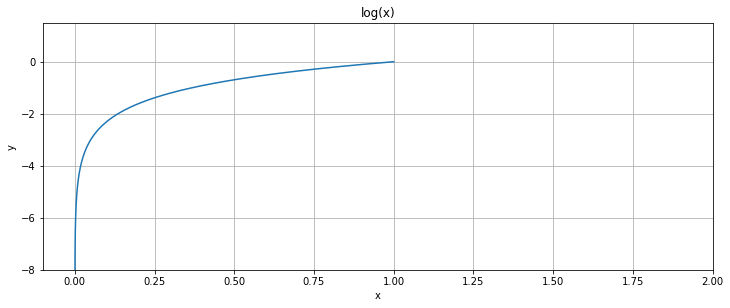

In [53]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

#t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

- under 0.50 isn't good
- log loss has nagtive becuse we work negtive area just and we want have postive value

# Training with Cross-Validation

In [49]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from farhad_DL.utility import missing_median, to_xy

In [50]:
path = "t81_558_deep_learning/data/"

filename_read = os.path.join(path,"auto-mpg.csv")
filename_write = os.path.join(path,"auto-mpg-out-of-sample.csv")

df = pd.read_csv(filename_read,na_values=['NA','?'])


df.horsepower = df.horsepower.replace('?',np.nan)
df.horsepower = df.horsepower.astype('float32')
# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

# Preprocess
df.horsepower = df.horsepower.replace('?',np.nan)
df.horsepower = df.horsepower.astype('float32')
 
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')

# Encode to a 2D matrix for training
x,y = to_xy(df,'mpg')

In [52]:
# Cross-Validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=10)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)        

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("Fold score (RMSE): {}".format(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final, out of sample score (RMSE): {}".format(score))    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
oosDF.to_csv(filename_write,index=False)


Fold #1
Fold score (RMSE): 8.535102844238281
Fold #2
Fold score (RMSE): 17.1900691986084
Fold #3
Fold score (RMSE): 12.070761680603027
Fold #4
Fold score (RMSE): 15.599876403808594
Fold #5
Fold score (RMSE): 11.622304916381836
Final, out of sample score (RMSE): 13.35825252532959


# Training with both a Cross-Validation and a Holdout Set


one problem for Cross-validation is that no unbiasied estimators of the variance of such average error estimate exit.

<img src="https://camo.githubusercontent.com/dc761c4688e34ae495b5a0bfdd09b5226edcb701/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f335f686f6c645f747261696e5f76616c2e706e67">

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold 
# dont used sklearn.corss_valdtion.Kflod
from keras.models import Sequential
from keras.layers.core import Dense, Activation

path = "./data/"

filename_read = os.path.join(path,"iris.csv")
filename_write = os.path.join(path,"iris-out-of-sample.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

# Encode to a 2D matrix for training
species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

# Cross-validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=25, verbose=1, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
    oos_pred.append(pred)        

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print("Fold score (accuracy): {}".format(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print("Final score (accuracy): {}".format(score))    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
oosDF.to_csv(filename_write,index=False)

# How Kaggle Competitions are Scored

<img src="https://camo.githubusercontent.com/0537bf301ca0ee16da1efb4377c9671eacc11024/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f335f6b6167676c652e706e67">

# Managing Hyperparameters


There are many different settings that you can use for a neural network. These can affect performance. The following code changes some of these, beyond their default values:<br>
- <b>activation:</b> relu, sigmoid, tanh
- Layers/Neuron Counts
- <b>optimizer:</b> adam, sgd, rmsprop, and others

In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import tensorflow as tf

path = "./data/"
preprocess = False

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# create feature vector
missing_median(df, 'horsepower')
encode_text_dummy(df, 'origin')
df.drop('name',1,inplace=True)
if preprocess:
    encode_numeric_zscore(df, 'horsepower')
    encode_numeric_zscore(df, 'weight')
    encode_numeric_zscore(df, 'cylinders')
    encode_numeric_zscore(df, 'displacement')
    encode_numeric_zscore(df, 'acceleration')

# Encode to a 2D matrix for training
x,y = to_xy(df,'mpg')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)

# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Error Calculation from Scratch
We will now look at how to calculate RMSE and logloss by hand. You will need to be able to perform this for the midterm.

## Regression

https://www.youtube.com/watch?v=iMyGyZYE9Lc&index=19&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&frags=pl%2Cwn

In [ ]:
from sklearn import metrics
import numpy as np

predicted = [1.1,1.9,3.4,4.2,4.3]
expected = [1,2,3,4,5]

score_mse = metrics.mean_squared_error(predicted,expected)
score_rmse = np.sqrt(score_mse)
print("Score (MSE): {}".format(score_mse))
print("Score (RMSE): {}".format(score_rmse))

In [ ]:
score_mse = ((predicted[0]-expected[0])**2 + (predicted[1]-expected[1])**2 
+ (predicted[2]-expected[2])**2 + (predicted[3]-expected[3])**2
+ (predicted[4]-expected[4])**2)/len(predicted)
score_rmse = np.sqrt(score_mse)
    
print("Score (MSE): {}".format(score_mse))
print("Score (RMSE): {}".format(score_rmse))

# Classification
We will now look at how to calculate a logloss by hand. For this we look at a binary prediction. The expected is always 0 or 1. The predicted is some number between 0-1 that indicates the probability true (1). Therefore, a prediction of 1.0 is completely correct if the expected is 1 and completely wrong if the expected is 0.

In [ ]:
from sklearn import metrics

expected = [1,1,0,0,0]
predicted = [0.9,0.99,0.1,0.05,0.06]

print(metrics.log_loss(expected,predicted))


In [ ]:
import numpy as np

score_logloss = (np.log(1.0-np.abs(expected[0]-predicted[0]))+\
np.log(1.0-np.abs(expected[1]-predicted[1]))+\
np.log(1.0-np.abs(expected[2]-predicted[2]))+\
np.log(1.0-np.abs(expected[3]-predicted[3]))+\
np.log(1.0-np.abs(expected[4]-predicted[4])))\
*(-1/len(predicted))

print(f'Score Logloss {score_logloss}')